## Karatsuba vs Gradeschool multiplication

These are two naive implementation of binary Karatsuba vs Gradeschool multiplication. Neither implementation takes advantage of the underlying Hardware support for operations on 32 or 64 bit numbers. Thus neither should be used if you actually want to multiply numbers efficiently in practice. (In fact, you shouldn't use Python at all for this task.)

In [193]:
def gradeschool_mult(x,y):
    '''Multiply two integers via gradeschool algorithm.'''
    x = str(x);  
    z = 0
    for i in range(len(x)):
        z += 10**i*int(x[len(x)-1-i])*y
   
    return z

In [183]:
def gradeschool_mult(x,y):
    if x<10 or y<10: return x*y
    x = str(x); y = str(y); 
    # convert to string of 0/1's, MSB first
    n = max(len(x),len(y))
    x = "0"*(n-len(x))+x; y = "0"*(n-len(y))+y # add leading zeroes if needed
    m = n//2
    xtop = int(x[:-m]); xbot = int(x[-m:])
    ytop = int(y[:-m]); ybot = int(y[-m:])
    return 10**(2*m)*gradeschool_mult(xtop,ytop)+10**m*(gradeschool_mult(xtop,ybot)+gradeschool_mult(xbot,ytop))+gradeschool_mult(xbot,ybot)

In [184]:
gradeschool_mult(123,343)

42189

In [194]:
def karatsuba_mult(x,y):
    '''Multiply two simlar length integers via karatsuba algorithm.'''
    if x<100 or y<100: return x*y
    x = str(x); y = str(y); 
    # convert to string of 0/1's, MSB first
    n = max(len(x),len(y))
    x = "0"*(n-len(x))+x; y = "0"*(n-len(y))+y # add leading zeroes if needed
    m = n//2
    xtop = int(x[:-m]); xbot = int(x[-m:])
    ytop = int(y[:-m]); ybot = int(y[-m:])
    return (10**(2*m)-10**m)*karatsuba_mult(xtop,ytop)+(10**m)*karatsuba_mult(xtop+xbot,ytop+ybot) +(1-10**m)*karatsuba_mult(xbot,ybot)
    

In [186]:
karatsuba_mult(12342323,3464565463)

42760785998990549

In [187]:
12342323* 3464565463

42760785998990549

In [199]:
input_lengths  = [2**i for i in range(5,16,2)]
gradeschool_times = {}
karatsuba_times = {}


In [201]:
import random
for n in input_lengths:
    x = random.randrange(10**n)
    y = random.randrange(10**n)
    r = x*y
    #print(r)
    print(f"Gradeschool n = {n}")
    foo =  %timeit -o -r1 -n1 gradeschool_mult(x,y)
    print(f"Karatsuba n = {n}")
    bar = %timeit -o -r1 -n1 karatsuba_mult(x,y)
    gradeschool_times[n] = foo
    karatsuba_times[n] = bar

Gradeschool n = 32
1 loop, best of 1: 80.2 µs per loop
Karatsuba n = 32
1 loop, best of 1: 676 µs per loop
Gradeschool n = 128
1 loop, best of 1: 491 µs per loop
Karatsuba n = 128
1 loop, best of 1: 5.73 ms per loop
Gradeschool n = 512
1 loop, best of 1: 3.01 ms per loop
Karatsuba n = 512
1 loop, best of 1: 74.9 ms per loop
Gradeschool n = 2048
1 loop, best of 1: 119 ms per loop
Karatsuba n = 2048
1 loop, best of 1: 457 ms per loop
Gradeschool n = 8192
1 loop, best of 1: 4.03 s per loop
Karatsuba n = 8192
1 loop, best of 1: 3.86 s per loop
Gradeschool n = 32768
1 loop, best of 1: 2min 22s per loop
Karatsuba n = 32768
1 loop, best of 1: 36.1 s per loop


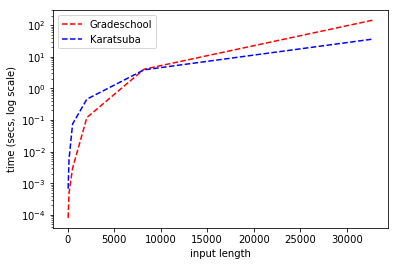

In [212]:
import matplotlib.pyplot as plt

gs_lengths, gs_times = zip(*sorted(gradeschool_times.items())) # unpack a list of pairs into two tuples

ka_lengths, ka_times =  zip(*sorted(karatsuba_times.items()))

gs_times = [t.best for t in gs_times]
ka_times = [t.best for t in ka_times]

line1, line2 = plt.plot(gs_lengths, gs_times, 'r--', ka_lengths, ka_times, 'b--')
plt.xlabel('input length')
plt.ylabel('time (secs, log scale)')
plt.yscale('log')
plt.legend([line1,line2],['Gradeschool','Karatsuba'])
plt.show()


In [213]:
plt.savefig('karastubavsgschool.png')